In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('canada_per_capita_income.csv')
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [60]:
X = df[['year']] # Independent variable (must be 2D for sklearn)
y = df['per capita income (US$)'] # Output - dependent variable

model = LinearRegression() # Create and train linear regression model
model.fit(X, y)
y_pred = model.predict(X) # prediction of income

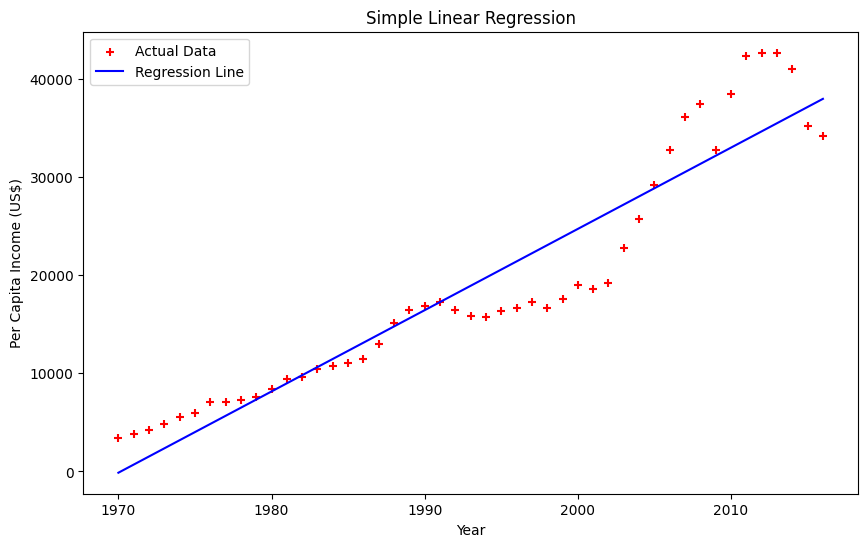

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', marker='+', label='Actual Data')  # Scatter plot of actual data
plt.plot(X, y_pred, color='blue', label='Regression Line')       # Regression line
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

Evaluation of obtained results

In [62]:
# lower mse better performance, 0 mse is perfect model
#mse = 1/n summ (actual - predicted ) * 2 
#higher r**2 better fit r**2 = 1 better fit, 0 model does't explain variance
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 15462739.061504772
R-squared (R²): 0.890916917957032


After training model dropping target variable income and using trained model predicting the target variable, by providing input year. New file is saved as income_prediction.csv

In [63]:
new_df = df.drop(y.name, axis=1)
model.fit(new_df, y)

# Predict income for the new dataset
income_new = model.predict(new_df)

# Add predictions to the new DataFrame
new_df['income'] = income_new

# Save the updated DataFrame to a new CSV income_prediction.csv file
new_df.to_csv("income_prediction.csv", index=False)

print("Predictions saved to 'income_prediction.csv'")


Predictions saved to 'income_prediction.csv'
